In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, pyproj
from matplotlib import animation
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from wand.image import Image
from wand.display import display

In [3]:
ncep_hrrr = netCDF4.Dataset('http://thredds-jumbo.unidata.ucar.edu/thredds/dodsC/grib/NCEP/HRRR/CONUS_2p5km/TwoD')

In [4]:
ncep_hrrr.variables['Planetary_boundary_layer_height_surface']

<type 'netCDF4._netCDF4.Variable'>
float32 Planetary_boundary_layer_height_surface(reftime, time, y, x)
    long_name: Planetary boundary layer height @ Ground or water surface
    units: m
    abbreviation: HPBL
    missing_value: nan
    grid_mapping: LambertConformal_Projection
    coordinates: reftime time y x 
    Grib_Variable_Id: VAR_0-3-18_L1
    Grib2_Parameter: [ 0  3 18]
    Grib2_Parameter_Discipline: Meteorological products
    Grib2_Parameter_Category: Mass
    Grib2_Parameter_Name: Planetary boundary layer height
    Grib2_Level_Type: Ground or water surface
    Grib2_Generating_Process_Type: Forecast
unlimited dimensions: 
current shape = (85, 16, 1377, 2145)
filling off

In [5]:
ncep_hrrr.variables['Planetary_boundary_layer_height_surface'].dimensions

(u'reftime', u'time', u'y', u'x')

In [6]:
print ncep_hrrr.variables['Planetary_boundary_layer_height_surface'].dimensions[3]

x


In [7]:
print ncep_hrrr.variables['x'].units

km


In [8]:
#np.meshgrid returns coordinate matrices from coordinate vectors
xg1, yg1 = np.meshgrid(ncep_hrrr.variables['x'][:]*1000.0, ncep_hrrr.variables['y'][:]*1000.0)

In [9]:
var = ncep_hrrr.variables['Planetary_boundary_layer_height_surface']

In [10]:
x = xg1
y = yg1
z = var[0,0,:,:]

{-105.0: ([<matplotlib.lines.Line2D at 0x107e74950>],
  [<matplotlib.text.Text at 0x107b5ab90>]),
 -100.0: ([<matplotlib.lines.Line2D at 0x107e7ffd0>],
  [<matplotlib.text.Text at 0x107b660d0>]),
 -95.0: ([<matplotlib.lines.Line2D at 0x107b5a690>],
  [<matplotlib.text.Text at 0x107b66510>])}

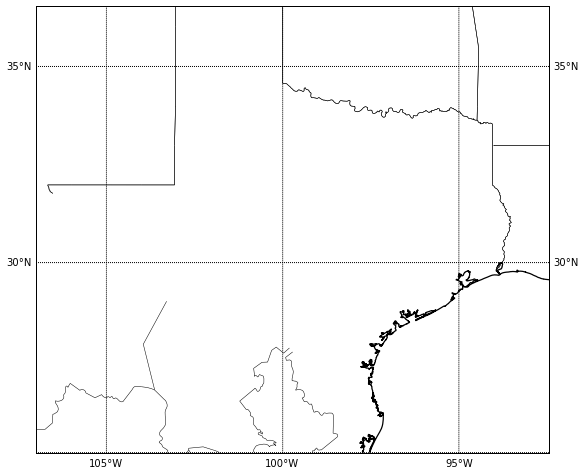

In [12]:
f = plt.figure(figsize = [15,8])
m = Basemap(llcrnrlon = -107,llcrnrlat = 25, urcrnrlon = -92.44,
               urcrnrlat = 36.5, projection = 'mill', area_thresh =1000,
               resolution='h')
m.drawstates()
m.drawcoastlines(linewidth = 1.25)
m.drawparallels(np.linspace(10,50, 9) ,labels=[1,1,0,0])
m.drawmeridians(np.linspace(-110, -80,7),labels=[0,0,0,1]) 

<matplotlib.colorbar.Colorbar instance at 0x1081805a8>

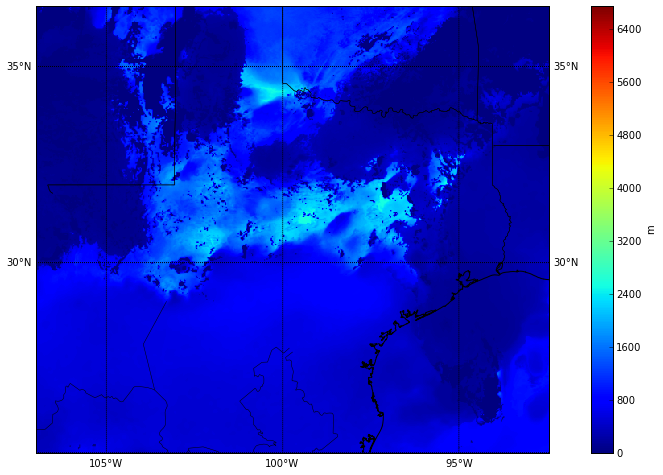

In [20]:
f = plt.figure(figsize = [15,8])
m = Basemap(llcrnrlon = -107,llcrnrlat = 25, urcrnrlon = -92.44,
               urcrnrlat = 36.5, projection = 'mill', area_thresh =1000,
               resolution='h')
m.pcolormesh(x, y, ncep_hrrr.variables['Planetary_boundary_layer_height_surface'][0,0,:,:], vmin = None, vmax = None)
m.drawparallels(np.linspace(10, 50, 9) ,labels=[1,1,0,0])
m.drawmeridians(np.linspace(-110, -80,7),labels=[0,0,0,1]) 
m.drawstates()
m.drawcoastlines()
plt.colorbar(label='m')

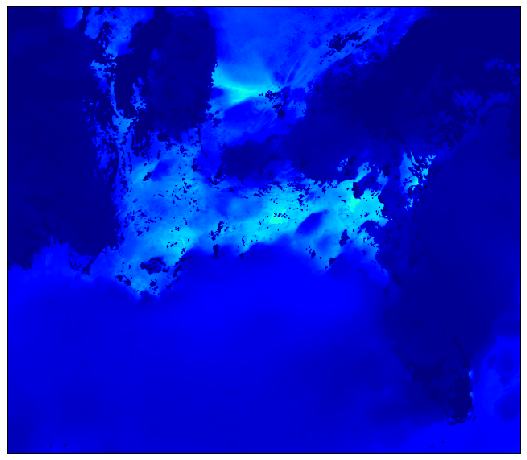

In [61]:
f = plt.figure(figsize = [15,8])
m = Basemap(llcrnrlon = -107,llcrnrlat = 25, urcrnrlon = -92.44,
               urcrnrlat = 36.5, projection = 'mill', area_thresh =1000,
               resolution='h')
var1 = ncep_hrrr.variables['Planetary_boundary_layer_height_surface']

m.pcolormesh(x, y, var1[0,0,:,:], vmin = None, vmax = None)

In [28]:
var1 = ncep_hrrr.variables['Planetary_boundary_layer_height_surface']

In [48]:
a = var1
print a.dimensions
print a.shape[0]
print a.shape[1]
#print i.dimensions[0] = i.shape[0]

(u'reftime', u'time', u'y', u'x')
87
16


In [62]:
i = a.shape[0]
j = a.shape[1]
count = 0
count1 = 0
var1 = ncep_hrrr.variables['Planetary_boundary_layer_height_surface']

In [50]:
print i, j

87 16


In [58]:
count = 456
print 'PBL_%04d.png' %count

PBL_0456.png


In [59]:
for num in range(0, 56):
    print 'PBL_%04d.png' %num

PBL_0000.png
PBL_0001.png
PBL_0002.png
PBL_0003.png
PBL_0004.png
PBL_0005.png
PBL_0006.png
PBL_0007.png
PBL_0008.png
PBL_0009.png
PBL_0010.png
PBL_0011.png
PBL_0012.png
PBL_0013.png
PBL_0014.png
PBL_0015.png
PBL_0016.png
PBL_0017.png
PBL_0018.png
PBL_0019.png
PBL_0020.png
PBL_0021.png
PBL_0022.png
PBL_0023.png
PBL_0024.png
PBL_0025.png
PBL_0026.png
PBL_0027.png
PBL_0028.png
PBL_0029.png
PBL_0030.png
PBL_0031.png
PBL_0032.png
PBL_0033.png
PBL_0034.png
PBL_0035.png
PBL_0036.png
PBL_0037.png
PBL_0038.png
PBL_0039.png
PBL_0040.png
PBL_0041.png
PBL_0042.png
PBL_0043.png
PBL_0044.png
PBL_0045.png
PBL_0046.png
PBL_0047.png
PBL_0048.png
PBL_0049.png
PBL_0050.png
PBL_0051.png
PBL_0052.png
PBL_0053.png
PBL_0054.png
PBL_0055.png


IndexError: 

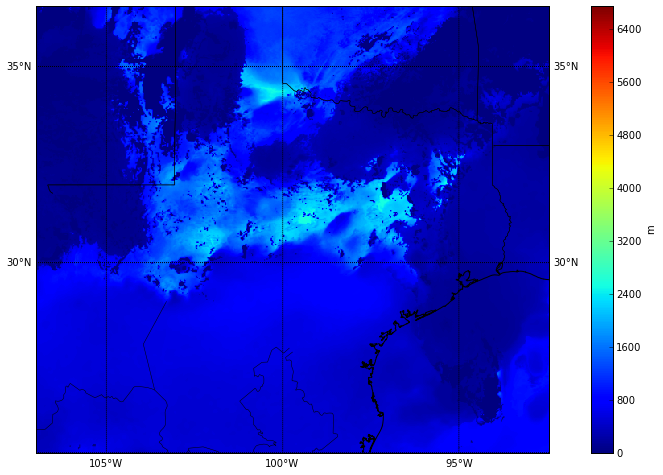

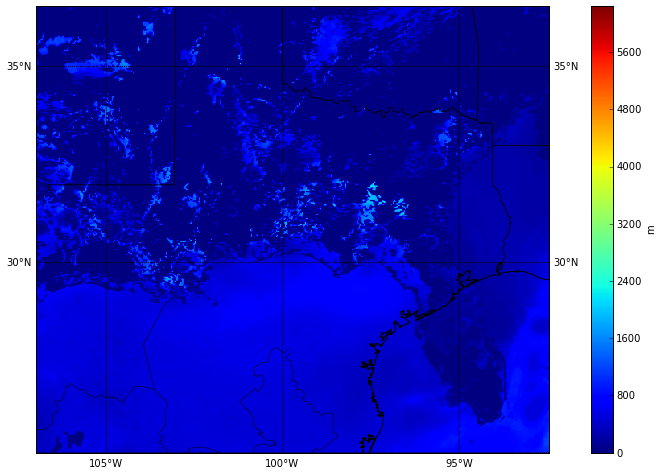

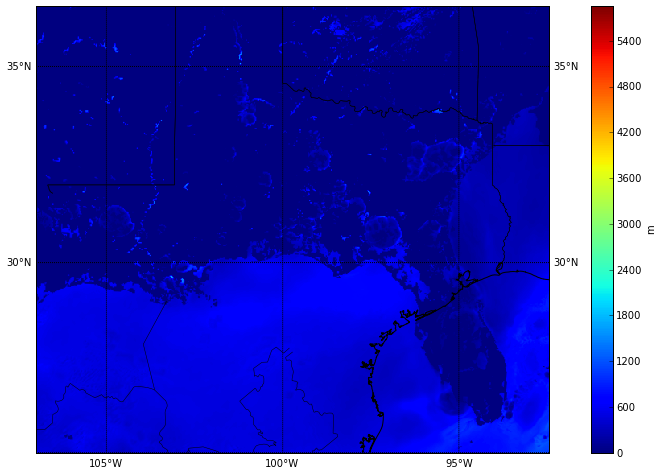

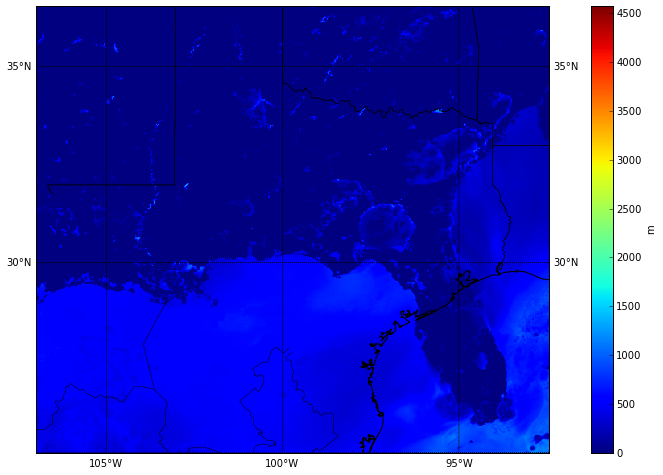

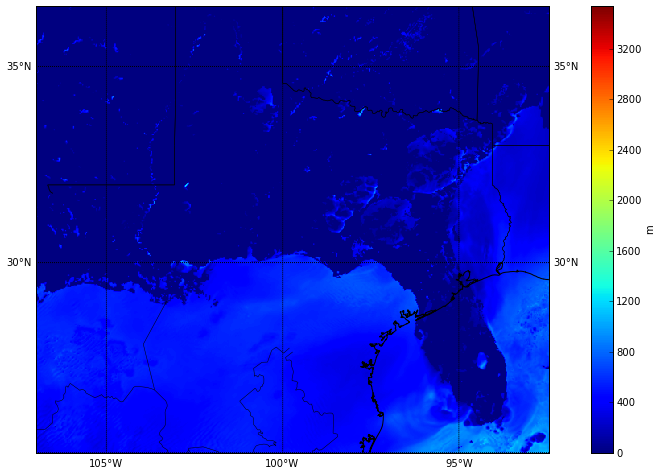

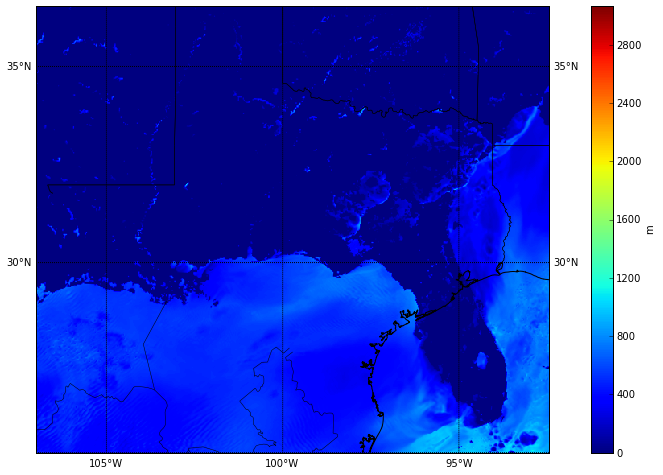

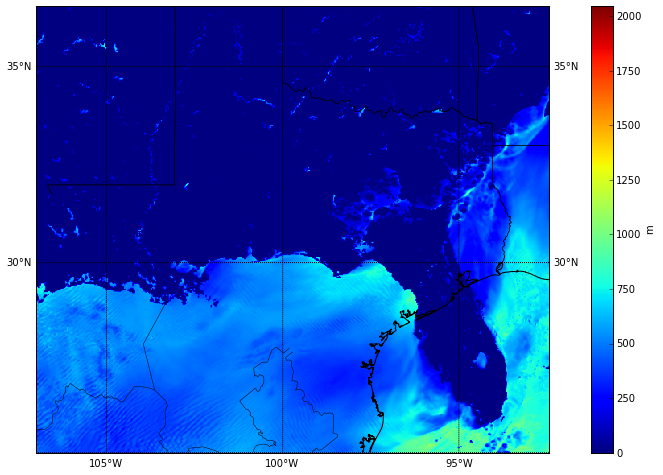

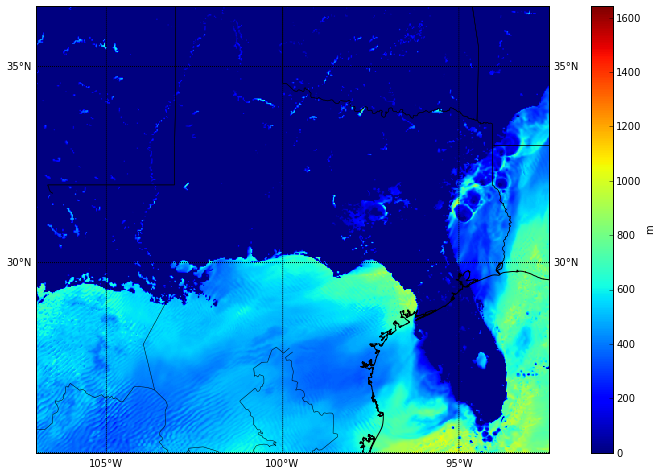

KeyboardInterrupt: 

In [62]:
num = 0
while count <= i:
    while count1 <= j:
        f = plt.figure(figsize = [15,8])
        m = Basemap(llcrnrlon = -107,llcrnrlat = 25, urcrnrlon = -92.44,
                   urcrnrlat = 36.5, projection = 'mill', area_thresh =1000,
                   resolution='h')
        m.pcolormesh(x, y, a[count,count1,:,:], vmin = None, vmax = None)
        m.drawparallels(np.linspace(10, 50, 9) ,labels=[1,1,0,0])
        m.drawmeridians(np.linspace(-110, -80,7),labels=[0,0,0,1]) 
        m.drawstates()
        m.drawcoastlines(linewidth=1.25)
        plt.colorbar(label='m')
        savefig('PBL_%04d.png' %num)
        if count1 == j:
            count1 = 0
        else:
            count1 += 1
        num += 1
    count += 1